# Basics For Molecular Data Handling

1. S. C. Teguia Kouam, steve.teguia@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Douala
1. J-P. Tchapet Njafa, jean-pierre.tchapet@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Maroua
1. S. G. Nana Engo, serge.nana-engo@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I
       
*September 2023*

This Tutorial aims to aid in the process of handling molecular data to be used for **cheminformatics works**. For this purpose, as first step, we will learn how to deal with molecular **SMILES** (Simplified Molecular Input Line Entry System), being one of the most common practice to represent molecules as raw input for computer algorithms.

## Download Our DataBase

To move forward, we suggest downloading first a dataset containing molecular files. We choose an arbitrary dataset from the `Zenodo` repository (https://zenodo.org/record/4641960/files/Diversity.zip?download=1). This dataset is composed of several molecular files (with `.txt` extensions) each of them containing a list of SMILES.


## Read Molecular Files 

In [1]:
# import libraries
import os

In [2]:
# path to the current work directory
main_path = os.getcwd()
# path to the database
#path_to_db = os.path.join(main_path + '/../Datasets/Diversity/diversity/')
# path to a specific molecular file: first file containing 1000 SMILES
mol_file = main_path  + '/chembl_24.1_smiles-n=1000-min_tc=0.0-sample_idx=1.txt'

**1. First Method**

In [3]:
with open(mol_file, 'r') as file:
    file1 = file.read().split('\n')

type(file1)

**Select the first molecular smiles of the file**

In [9]:
smiles1 = file1[0]
smiles1

'CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1'

**2. Second Method**

In [10]:
# open the file while changing the encoding to 'utf-8'
file2 = open(mol_file, encoding='utf-8')

file2

<_io.TextIOWrapper name='/home/mvoto/Téléchargements/RC1/chembl_24.1_smiles-n=1000-min_tc=0.0-sample_idx=1.txt' mode='r' encoding='utf-8'>

In [11]:
# read the lines of the molecular file
lin = file2.readlines()

In [12]:
len(lin)

1000

**Select the first molecular smiles of the file**

In [14]:
smiles1 = lin[0].split()[0]
smiles1

'CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1'

## Create Molecular Objects

### **Using `OpenBabel`**

In [15]:
# import libraries 
from openbabel import pybel as pb  
from openbabel import openbabel as ob 

**create an `openbabel` molecular object**

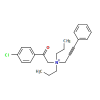

In [16]:
# create an openbabel molecular object
obmol = pb.readstring('smiles', smiles1)
obmol

**Add Hydrogen atoms to our molecule for 3D**

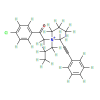

In [17]:
# add Hs to our Molecule
obmol.addh()
obmol

**Generate 3D Structure-Coordinates of every atoms in the molecule**

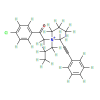

In [23]:
# generate 3D structure 
obmol.make3D()
obmol

In [24]:
ob_mol = obmol.OBMol
sp = []
coords = []
for atom in ob.OBMolAtomIter(ob_mol):
    sp.append(atom.GetAtomicNum())
    coords.append([atom.GetX(), atom.GetY(), atom.GetZ()])

print(sp)
print(coords)

[6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 17, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0.9823441738856182, -0.39515392753980394, 0.21392883680873484], [0.42073598683371144, 0.6115247151660266, 1.2055389927494309], [0.835746677177922, 2.0424374102806944, 1.0129978166761917], [0.33172794941638273, 2.6282980723781004, -0.314013092889948], [-1.199380131499873, 2.6583692087240016, -0.42407901612053994], [-1.7664316133781197, 4.055935661369218, -0.4595048246932311], [-2.0383675022229903, 5.197632854883514, -0.5370266515120291], [-2.472095922603632, 6.555190619220443, -0.7952375540286765], [-3.641271068837568, 6.660318828039775, -1.5408892048019993], [-4.1780623065292914, 7.907533008114493, -1.822959813878859], [-3.538105037435856, 9.054461862664965, -1.3613577914937143], [-2.3514409173138224, 8.954796090838181, -0.6302588882419004], [-1.8057074006561316, 7.6969666187667105, -0.3470745099777672], [0.6339849160011167, 

In [25]:
ob_mol.NumAtoms()

53

### **Using `RDKit`**

In [26]:
# import libraries
from rdkit.Chem import AllChem
from rdkit import Chem

**create `RDKit` molecular object**

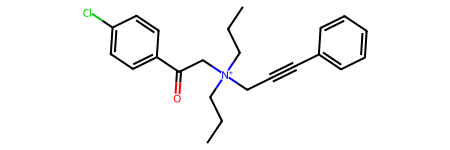

In [27]:
rdmol = Chem.MolFromSmiles(smiles1)
rdmol

**Add explicit Hydrogen atoms to our molecule for 3D generation**

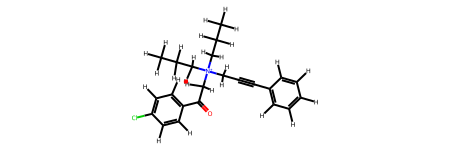

In [28]:
rdmol = Chem.AddHs(rdmol)
rdmol

In [29]:
# check the number of atoms in the molecule
rdmol.GetNumAtoms()

53

**Try to generate `conformers` and embed them to the 3D structure**

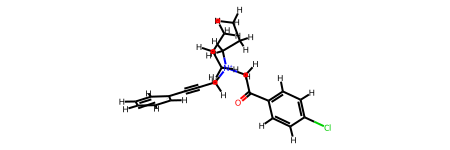

In [42]:
confid = AllChem.EmbedMolecule(rdmol)
rdmol

In [34]:
# returns the id of the generated conformer,
# and -1 if no conformers were generated
confid

0

**Generate 3D atomic coordinates of the molecule**

In [21]:
for i, atom in enumerate(rdmol.GetAtoms()):
        positions = rdmol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -1.028131340943831 -4.282208908827857 -1.0468566473063163
C -1.876558689353685 -3.1692416350768453 -1.5336271995584714
C -1.9817449146341122 -1.9504568061158376 -0.6825408716546919
N -0.8307965073688657 -1.196767238145799 -0.4148037366059319
C 0.030205696216546906 -1.2952343388875707 -1.635501050105182
C 1.3051482138689026 -0.5880404866040065 -1.3400114761416488
C 2.330814767868759 0.0005253065201858681 -1.1065672460515559
C 3.534602594765519 0.7178800959336887 -0.8334682228604449
C 4.5290528965083245 0.15086822776749007 -0.0627046454578239
C 5.692041852807918 0.8378264832427833 0.20513018635427113
C 5.891963441481194 2.1153023088557013 -0.2928947161638436
C 4.911069224296034 2.694019058507135 -1.062295541822523
C 3.758175978429987 1.9928577039794149 -1.3183513946928802
C 0.015186221485924686 -1.485808357469353 0.6621916149041327
C -0.4669426165834004 -2.0644865714041347 1.91679998354642
C 0.7173429081579362 -2.2748249722655274 2.885899744954497
C -1.1668791943063983 0.22283561313515

**`Optimze` the molecular strcuture with `MMFF94` ForceField**

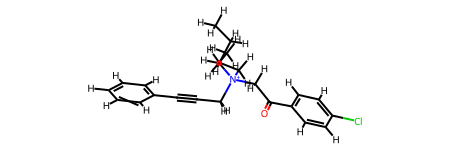

In [49]:
AllChem.MMFFOptimizeMolecule(rdmol)
rdmol

**Generate 3D atomic coordinates of the optimized structure**

In [50]:
for i, atom in enumerate(rdmol.GetAtoms()):
        positions = rdmol.GetConformer().GetAtomPosition(i)
        print(atom.GetSymbol(), positions.x, positions.y, positions.z)

C -0.6104183331212564 3.384529259856784 1.9005861405112794
C 0.31266999264687323 2.4435982570995085 1.1368872206582126
C -0.38616842266309725 1.1102161748340444 0.8611377422631076
N 0.45037323384349787 0.12486650001241581 0.006294179926529202
C -0.30436871198916776 -1.2422932165526581 -0.13076280098828977
C -1.7545758718264663 -1.097169261664286 -0.2700574178270318
C -2.94583154808634 -0.9887441641564582 -0.38350011781695037
C -4.361439655276625 -0.840282075847442 -0.5210809681703382
C -4.892969861392241 -0.24693179943564525 -1.6687920288087645
C -6.2747400735899905 -0.09580278804227071 -1.7999027370607983
C -7.124307561362467 -0.536910830086628 -0.7858345398930605
C -6.595062122467409 -1.1307033845628232 0.35961583901074634
C -5.2136272657781655 -1.2830811199386234 0.49323643978743725
C 0.810358502415507 0.6753919851546742 -1.39325853724551
C -0.38551371341691987 1.1484630270068124 -2.2181279344479177
C 0.0761648946627231 1.712904958127379 -3.555962902548493
C 1.8098463898051198 -0.16

## Save molecular structures

**`.xyz` File**

In [51]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.xyz')

**`.sdf` File**

In [52]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.sdf')

**`.mol` File**

In [53]:
Chem.MolToMolFile(rdmol, 'RC1_rdmol.mol')

The molecular files generated above only contain information on _spatial atomic coordinates_ and _bond connectivities_. However they are capable of carrying more information than that, such as molecular properties (_internal energy_, _enthalpy_, etc.).

We are interested in the fact that all the information contained in each molecular file can be used to infer insights of significant importance when dealing with __structure-property relationships__. Indeed, all of this information leads to several categories of molecular representations which can be useful, each with a _specific level of content_, to molecular description. 

A deep understanding of quantitative structure-property relationships (QSPR) finds applications in real current global challenges such as **materials discovery**, **drug discovery processes**, **chemical property predictions**, etc.

## Molecular Descriptors - Dimensional Representations

Molecular descriptors can be classified in two main categories:

1. **Experimental descriptors**: Physicochemical properties from __numerical simualtions__ or __experimental measurements__

2. **Theoretical descriptors**: Obtained from __symbolic representations__ of the molecules, such as structural formula, empirical formula, or `SMILES`. 

This category can be divided in **five** classes.


![](MolecularDimension.png)

1. **0D descritors**. Related to `Composition` discriptors, do not provide any information about the molecular structure or connectivity of atoms.

1. **1D descritors**. Related to sets of substructures such as functional groups.

1. **2D descritors**. Features providing information on molecular topology based on the graph representation of the molecules.

1. **3D descritors**. Geometrical features providing information about spatial coordinates of atoms of a molecule.

1. **4D descritors**. Also known as **grid-based descriptors**, introduce a fourth dimension characterizing the interactions between the molecules and the active sites of a receptor or the multiple conformational states of the molecules. 

# `Tartarus` Basic Usage

For this first session, we will introduce the basics of `Tartarus`: A benchmark platform for practical inverse molecular design. To this end, after the installation task of the module `tartarus`, we will look at its framework. 

![](tartarusoverview.png)

## In Practice

**1. Design of `OPVs` - Framework**

![](opv.png)

**2. Design of `Organic Emitters` - Framework**

![](emitters.png)

**3. Design of `Protein Ligands` - Framework**

![](docking.png)


## Practical Coding For `OPV` Design - Use `Tartarus` As A Blackbox

**1. Load the data used for this purpose into the original work**

In [54]:
# path to the hce.csv data 
path_to_hce = os.path.join(main_path + '/hce.csv')

In [55]:
# display the .csv file as dataframe
import pandas as pd
hce = pd.read_csv(path_to_hce)
hce

,smiles,pce_pcbm_sas,pce_pcdtbt_sas,pce_1,pce_2,sas
0,c1sc(-c2[SiH2]c(cc2)-c2ccc(-c3scc4occc34)c3csc...,-1.061257,-4.382105,3.320848,0.0,4.382105
1,c1ccc(C2=Cc3oc4c(c3C2)c2c[nH]cc2c2ccc3=CCC=c3c...,-3.188265,-3.607924,0.419659,0.0,3.607924
2,c1cc2sc3cc4ccc5cscc5c4cc3c2c2cCcc12,-0.767370,-3.361486,2.594116,0.0,3.361486
3,[nH]1c2cc(-c3ccc[se]3)c3c[nH]cc3c2c2c1c1[se]cc...,-3.572659,-4.618362,1.045703,0.0,4.618362
4,[SiH2]1C=CC=C1c1cc2sc3c4[se]ccc4c4cocc4c3c2c2c...,-1.675279,-4.853093,3.177815,0.0,4.853093
...,...,...,...,...,...,...
24948,[SiH2]1C=CC=C1C1=Cc2cc3ccc4ccc5c[nH]cc5c4c3cc2...,-2.797039,-4.418456,1.621417,0.0,4.418456
24949,c1cc2ccc3cc4cc(-c5ncncn5)c5=C[SiH2]C=c5c4cc3c2...,1.610517,-3.828723,5.439241,0.0,3.828723
24950,c1sc(c2C=CCc12)-c1cc2ncc3c4ccccc4c4ccccc4c3c2cn1,-0.239583,-2.952342,2.712759,0.0,2.952342
24951,c1sc(-c2ccc(s2)-c2Cc(cc2)-c2cncc3nsnc23)c2ccsc12,4.575720,-3.706835,8.282555,0.0,3.706835


**2. Use the `SMILES` from the diversity data loaded above to run `Tartarus`**

In [29]:
# creat an empty dictionary
from collections import defaultdict
data = defaultdict(list)

**Get a database similar to the one from the original work**

In [30]:
for i in range(len(lin)):
    smiles = lin[i].split()[0]
    if i==2: break
    data['smiles'].append(smiles)

df = pd.DataFrame(data)
df

,smiles
0,CCC[N+](CC#Cc1ccccc1)(CCC)CC(=O)c1ccc(Cl)cc1
1,NC(=S)NN=Cc1ccc(O)cc1O


In [31]:
# save the dataframe to `.csv` file
df.to_csv('my_hce.csv')

In [32]:
smiles = df['smiles'].tolist()
smi = smiles[0]

In [33]:
#pip install tartarus

In [34]:
#pip install pce

In [35]:
#pip install --upgrade tartarus


In [36]:
#conda activate tartarus


In [37]:
#conda list


In [56]:
pip install tartarus


Note: you may need to restart the kernel to use updated packages.


In [57]:
import tartarus

In [58]:
import pce

In [59]:
#pip install pce


In [60]:
pce?

Type:        module
String form: <module 'pce' from '/home/mvoto/anaconda3/lib/python3.10/site-packages/pce/__init__.py'>
File:        ~/anaconda3/lib/python3.10/site-packages/pce/__init__.py
Docstring:   <no docstring>

In [62]:
## use full xtb calculation in hce module
from tartarus import pce
#from tartarus import docking
#from tartarus import tadf
#from tartarus import reactivity

dipm, gap, lumo, combined, pce_pcbm_sas, pce_pcdtbt_sas = pce.get_properties(smi)

ImportError: cannot import name 'pce' from 'tartarus' (/home/mvoto/anaconda3/lib/python3.10/site-packages/tartarus.py)